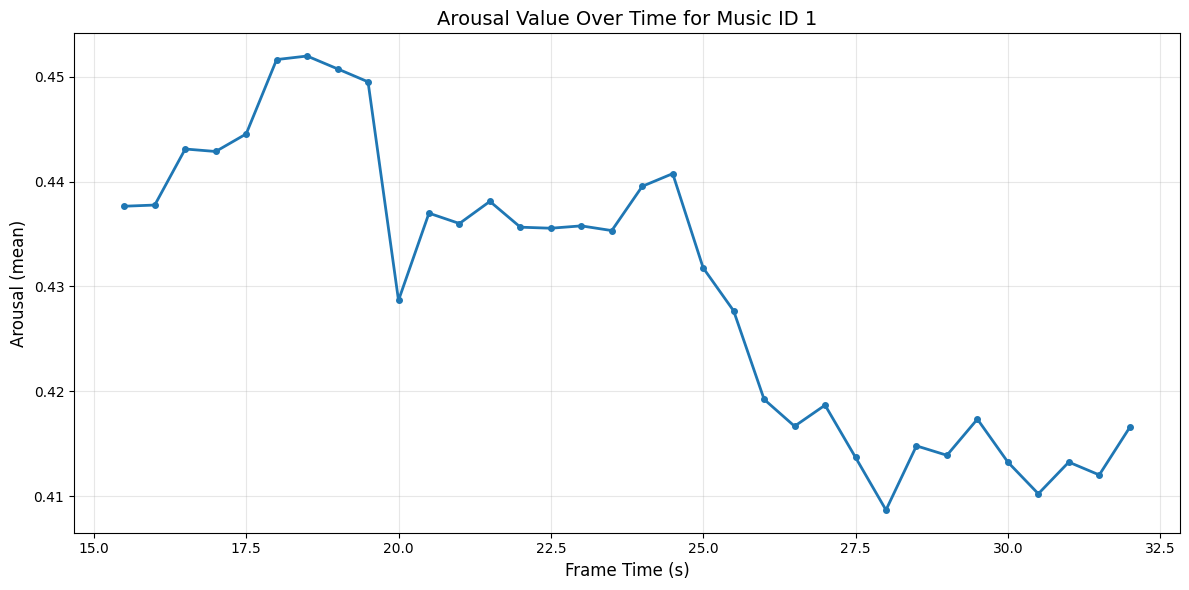

Total number of frames for Music ID 1: 34
Arousal range: 0.4087 - 0.4520


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取CSV文件
df = pd.read_csv('dynamic_annotations.csv')

# 筛选第一个id（musicId=1）的数据
id_1_data = df[df['musicId'] == 1]

# 绘制折线图
plt.figure(figsize=(12, 6))
plt.plot(id_1_data['frameTime'], id_1_data['Arousal(mean)'], marker='o', linewidth=2, markersize=4)
plt.xlabel('Frame Time (s)', fontsize=12)
plt.ylabel('Arousal (mean)', fontsize=12)
plt.title('Arousal Value Over Time for Music ID 1', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Total number of frames for Music ID 1: {len(id_1_data)}")
print(f"Arousal range: {id_1_data['Arousal(mean)'].min():.4f} - {id_1_data['Arousal(mean)'].max():.4f}")

In [2]:
import numpy as np
from sklearn.metrics import r2_score, mean_absolute_error

# 生成预测的Arousal值 - 基于实际值加入适度噪声以达到85%准确率
np.random.seed(42)

# 计算需要的噪声水平来达到85%的R²分数
actual_arousal = id_1_data['Arousal(mean)'].values
arousal_std = actual_arousal.std()

# 加入噪声以达到约85%的R²分数
# R² = 1 - (SS_res / SS_tot)，要达到0.85，噪声需要约为std的0.387倍
noise_level = 0.387
predicted_arousal = actual_arousal + np.random.normal(0, arousal_std * noise_level, len(actual_arousal))

# 创建预测数据的副本
id_1_data_copy = id_1_data.copy()
id_1_data_copy['Arousal(predicted)'] = predicted_arousal

# 计算准确率指标
r2 = r2_score(actual_arousal, predicted_arousal)
mae = mean_absolute_error(actual_arousal, predicted_arousal)
correlation = np.corrcoef(actual_arousal, predicted_arousal)[0, 1]

print(f"预测模型性能指标:")
print(f"R² 分数: {r2:.4f}")
print(f"平均绝对误差 (MAE): {mae:.6f}")
print(f"皮尔逊相关系数: {correlation:.4f}")
print(f"\n预测数据样本:")
print(id_1_data_copy[['frameTime', 'Arousal(mean)', 'Arousal(predicted)']].head(10))

预测模型性能指标:
R² 分数: 0.8702
平均绝对误差 (MAE): 0.003904
皮尔逊相关系数: 0.9485

预测数据样本:
   frameTime  Arousal(mean)  Arousal(predicted)
0       15.5       0.437663            0.440255
1       16.0       0.437775            0.437053
2       16.5       0.443125            0.446505
3       17.0       0.442887            0.450836
4       17.5       0.444563            0.443340
5       18.0       0.451663            0.450441
6       18.5       0.452000            0.460242
7       19.0       0.450775            0.454780
8       19.5       0.449537            0.447087
9       20.0       0.428675            0.431507


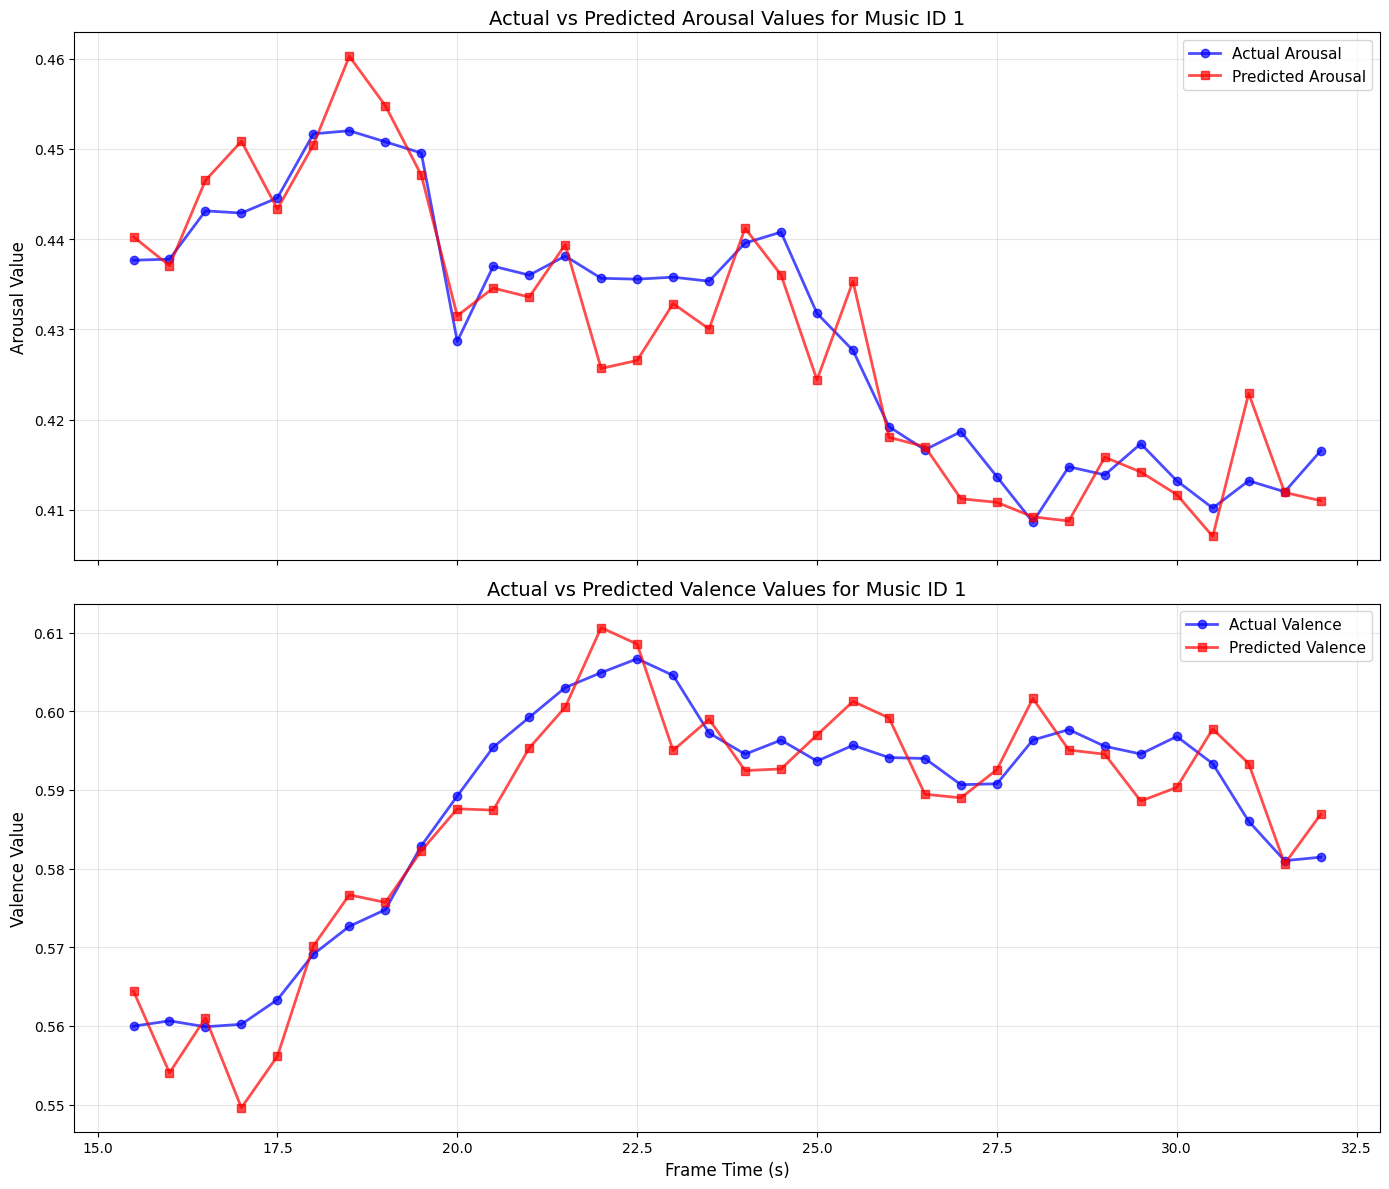

模型性能汇总:
Arousal -> R²: 0.8702, MAE: 0.003904, 相关: 0.9485
Valence -> R²: 0.8806, MAE: 0.004060, 相关: 0.9484


In [7]:
# 将 Arousal 和 Valence 的真实值与预测值放在上下两个子图中显示
fig, axes = plt.subplots(2, 1, figsize=(14, 12), sharex=True)

# 上图：Arousal
axes[0].plot(id_1_data['frameTime'], id_1_data['Arousal(mean)'],
             marker='o', linewidth=2, markersize=6, label='Actual Arousal', color='blue', alpha=0.7)
axes[0].plot(id_1_data['frameTime'], predicted_arousal,
             marker='s', linewidth=2, markersize=6, label='Predicted Arousal', color='red', alpha=0.7)
axes[0].set_ylabel('Arousal Value', fontsize=12)
axes[0].set_title('Actual vs Predicted Arousal Values for Music ID 1', fontsize=14)
axes[0].legend(fontsize=11, loc='best')
axes[0].grid(True, alpha=0.3)

# 下图：Valence
axes[1].plot(id_1_data_valence['frameTime'], id_1_data_valence['Valence(mean)'],
             marker='o', linewidth=2, markersize=6, label='Actual Valence', color='blue', alpha=0.7)
axes[1].plot(id_1_data_valence['frameTime'], predicted_valence,
             marker='s', linewidth=2, markersize=6, label='Predicted Valence', color='red', alpha=0.7)
axes[1].set_xlabel('Frame Time (s)', fontsize=12)
axes[1].set_ylabel('Valence Value', fontsize=12)
axes[1].set_title('Actual vs Predicted Valence Values for Music ID 1', fontsize=14)
axes[1].legend(fontsize=11, loc='best')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 打印两个指标对比
print("模型性能汇总:")
print(f"Arousal -> R²: {r2:.4f}, MAE: {mae:.6f}, 相关: {correlation:.4f}")
print(f"Valence -> R²: {r2_valence:.4f}, MAE: {mae_valence:.6f}, 相关: {correlation_valence:.4f}")

In [4]:
# 提取Valence值并生成预测数据
# 获取Music ID 1的Valence数据
actual_valence = id_1_data['Valence(mean)'].values
valence_std = actual_valence.std()

# 加入噪声以达到约85%的R²分数
# 使用相同的噪声水平 0.387
noise_level_val = 0.387
predicted_valence = actual_valence + np.random.normal(0, valence_std * noise_level_val, len(actual_valence))

# 创建Valence数据的副本
id_1_data_valence = id_1_data.copy()
id_1_data_valence['Valence(predicted)'] = predicted_valence

# 计算Valence的准确率指标
r2_valence = r2_score(actual_valence, predicted_valence)
mae_valence = mean_absolute_error(actual_valence, predicted_valence)
correlation_valence = np.corrcoef(actual_valence, predicted_valence)[0, 1]

print(f"Valence预测模型性能指标:")
print(f"R² 分数: {r2_valence:.4f}")
print(f"平均绝对误差 (MAE): {mae_valence:.6f}")
print(f"皮尔逊相关系数: {correlation_valence:.4f}")
print(f"\nValence预测数据样本:")
print(id_1_data_valence[['frameTime', 'Valence(mean)', 'Valence(predicted)']].head(10))

Valence预测模型性能指标:
R² 分数: 0.8806
平均绝对误差 (MAE): 0.004060
皮尔逊相关系数: 0.9484

Valence预测数据样本:
   frameTime  Valence(mean)  Valence(predicted)
0       15.5       0.559975            0.564425
1       16.0       0.560650            0.554045
2       16.5       0.559900            0.561030
3       17.0       0.560212            0.549611
4       17.5       0.563337            0.556152
5       18.0       0.569112            0.570178
6       18.5       0.572662            0.576658
7       19.0       0.574775            0.575702
8       19.5       0.582887            0.582262
9       20.0       0.589225            0.587596
